In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from SqlAlquemySelectMarketDataHandler import SqlAlquemySelectMarketDataHandler

from dotenv import load_dotenv
load_dotenv()

import yfinance as yf

In [29]:
# Selected 27 most important countries that covers
# around 98% of total weight of MSCI ACWI in years 1999 - 2024

selected_countries = [
    'United States', 'Japan', 'United Kingdom', 
    'Canada', 'France', 'Switzerland', 'Germany', 
    'Australia', 'Netherlands', 'Sweden', 
    'Hong Kong', 'Spain', 'Italy', 
    'Singapore', 'Denmark', 'Finland',
    'Belgium', 'Norway',
    'China', 'Taiwan', 'India', 
    'Korea', 'Brazil', 'Russia',
    'South Africa', 'Mexico', 'Malaysia']
len(selected_countries)

27

### ETF data in USD from Nasdaq exchange which have the highest coverage

In [30]:
sql_handler = SqlAlquemySelectMarketDataHandler()
etfs_in_usd = sql_handler.read_market_symbols('ETF in USD')

48 market symbols read


In [31]:
etfs = etfs_in_usd[etfs_in_usd['Country'].isin(selected_countries)]
etfs.index = etfs['Country']
etfs

,Code,Description,Country
Country,,,
Denmark,EDEN,iShares MSCI Denmark ETF,Denmark
Finland,EFNL,iShares MSCI Finland ETF,Finland
Russia,ERUS,iShares MSCI Russia ETF,Russia
Australia,EWA,iShares MSCI Australia ETF,Australia
Canada,EWC,iShares MSCI Canada ETF,Canada
Sweden,EWD,iShares MSCI Sweden ETF,Sweden
Germany,EWG,iShares MSCI Germany ETF,Germany
Hong Kong,EWH,iShares MSCI Hong Kong ETF,Hong Kong
Italy,EWI,iShares MSCI Italy ETF,Italy


In [32]:
df_etfs = pd.DataFrame(index=pd.date_range('1999-01-04', '2023-12-29', freq='B'),
                       columns=selected_countries)

for country in selected_countries:
    symbol = etfs.loc[country]['Code']
    df_etfs.loc[:, country] = sql_handler.read_market_data(symbol)['Value']

6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
3033 market data read
3033 market data read
6320 market data read
3647 market data read
3240 market data read
5948 market data read
3027 market data read
5977 market data read
5934 market data read
3338 market data read
5291 market data read
6320 market data read
6320 market data read


In [33]:
df_etfs = df_etfs.astype(float).round(2)
df_etfs

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
1999-01-04,78.57,28.45,16.07,5.85,11.39,11.48,12.74,3.45,14.50,7.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.28,4.77
1999-01-05,79.47,28.28,16.21,5.94,11.45,11.64,12.61,3.45,14.70,7.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.32,4.95
1999-01-06,81.39,28.63,16.90,6.28,11.70,11.89,13.62,3.56,14.97,7.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.20,5.29
1999-01-07,80.99,28.80,16.60,6.19,11.61,11.81,12.68,3.63,14.53,8.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.13,5.21
1999-01-08,81.59,28.80,16.51,6.28,11.42,11.81,12.71,3.63,14.36,7.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.93,5.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,473.65,63.33,32.92,36.43,39.13,47.45,29.52,24.24,44.25,39.43,...,25.17,39.29,44.47,48.36,63.97,34.62,8.06,40.75,67.81,21.16
2023-12-26,475.65,63.31,33.09,36.83,39.37,47.70,29.69,24.44,44.66,39.60,...,25.37,39.57,45.41,48.53,64.27,35.15,8.06,40.97,68.31,21.11
2023-12-27,476.51,63.66,33.22,36.87,39.51,48.07,29.86,24.56,44.87,39.93,...,25.58,39.53,45.86,48.84,64.85,35.27,8.06,41.97,68.46,21.16
2023-12-28,476.69,64.04,33.05,36.70,39.13,47.86,29.66,24.49,44.64,39.75,...,25.24,40.46,46.03,49.02,65.98,35.11,8.06,40.94,67.96,21.21


In [34]:
for country in df_etfs.columns:    
    first_valid = df_etfs[country].first_valid_index()
    if not str(first_valid).startswith('1999-01-04'):
        print(country, first_valid)

Denmark 2012-01-26 00:00:00
Finland 2012-01-26 00:00:00
Norway 2009-08-19 00:00:00
China 2011-03-31 00:00:00
Taiwan 2000-06-23 00:00:00
India 2012-02-03 00:00:00
Korea 2000-05-12 00:00:00
Brazil 2000-07-14 00:00:00
Russia 2010-11-09 00:00:00
South Africa 2003-02-07 00:00:00


10 countries have incomplete ETF data

In [35]:
for country in df_etfs.columns:
    last_valid = df_etfs[country].last_valid_index()
    if not str(last_valid).startswith('2023-12-29'):
        print(country, last_valid)

### Stock indices for missing data

In [36]:
stock_indices = sql_handler.read_market_symbols('Stock Index')
stock_indices = stock_indices[stock_indices['Country'].isin(
    ['Taiwan', 'India', 'Korea', 'Brazil', 'Russia', 'Hong Kong', 
     'Denmark', 'Finland', 'Norway', 'South Africa'])]
stock_indices.index = stock_indices['Country']
stock_indices

45 market symbols read


,Code,Description,Country
Country,,,
India,^BSESN,S&P BSE Sensex,India
Brazil,^BVSP,BOVESPA,Brazil
Hong Kong,^HSI,Hang Seng,Hong Kong
Korea,^KS11,KOSPI,Korea
Finland,^OMXH25,OMX Helsinki 25,Finland
Taiwan,^TWII,TSEC Weighted,Taiwan
Russia,IMOEX.ME,MOEX,Russia
South Africa,JTOPI,FTSE JSE 40,South Africa
Norway,OBX,Olso OBX,Norway


In [37]:
df_stock_indices = pd.DataFrame(index=pd.date_range('1999-01-04', '2023-12-29', freq='B'),
                                columns=stock_indices.index)

for country in stock_indices.index:
    symbol = stock_indices.loc[country]['Code']
    df_stock_indices.loc[:, country] = sql_handler.read_market_data(symbol)['Value']

6547 market data read
6547 market data read
6547 market data read
6547 market data read
5979 market data read
6547 market data read
6547 market data read
6547 market data read
6371 market data read
5998 market data read


In [38]:
df_stock_indices = df_stock_indices.astype(float).round(2)
df_stock_indices

Country,India,Brazil,Hong Kong,Korea,Finland,Taiwan,Russia,South Africa,Norway,Denmark
1999-01-04,3122.04,6942.0,9809.17,587.57,NaN,6152.41,45.60,4542.55,NaN,NaN
1999-01-05,3149.06,7111.0,9891.06,576.78,NaN,6152.41,45.60,4565.49,NaN,NaN
1999-01-06,3205.68,7331.0,10233.80,612.36,NaN,6199.89,46.79,4822.16,NaN,NaN
1999-01-07,3299.09,6954.0,10693.57,637.59,NaN,6404.29,46.79,4866.61,NaN,NaN
1999-01-08,3397.84,6781.0,10722.70,626.33,NaN,6421.73,46.79,4957.42,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-25,71106.96,132753.0,16340.41,2599.51,4521.38,17604.84,3092.58,67966.89,1185.04,2267.75
2023-12-26,71336.80,133533.0,16624.84,2602.59,4545.88,17751.73,3094.72,67966.89,1185.04,2266.57
2023-12-27,72038.43,134194.0,16624.84,2613.50,4545.88,17891.50,3097.49,70273.03,1193.95,2266.57
2023-12-28,72410.38,134185.0,17043.53,2655.28,4529.24,17910.37,3101.99,70076.25,1191.90,2283.04


In [39]:
for country in df_stock_indices.columns:    
    first_valid = df_stock_indices[country].first_valid_index()
    if not str(first_valid).startswith('1999-01-04'):
        print(country, first_valid)

Finland 2001-03-08 00:00:00
Norway 1999-09-07 00:00:00
Denmark 2001-02-09 00:00:00


In [40]:
for country in df_stock_indices.columns:
    last_valid = df_stock_indices[country].last_valid_index()
    if not str(last_valid).startswith('2023-12-29'):
        print(country, last_valid)

In [41]:
df_stock_indices = df_stock_indices.ffill()
df_stock_indices

Country,India,Brazil,Hong Kong,Korea,Finland,Taiwan,Russia,South Africa,Norway,Denmark
1999-01-04,3122.04,6942.0,9809.17,587.57,NaN,6152.41,45.60,4542.55,NaN,NaN
1999-01-05,3149.06,7111.0,9891.06,576.78,NaN,6152.41,45.60,4565.49,NaN,NaN
1999-01-06,3205.68,7331.0,10233.80,612.36,NaN,6199.89,46.79,4822.16,NaN,NaN
1999-01-07,3299.09,6954.0,10693.57,637.59,NaN,6404.29,46.79,4866.61,NaN,NaN
1999-01-08,3397.84,6781.0,10722.70,626.33,NaN,6421.73,46.79,4957.42,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-25,71106.96,132753.0,16340.41,2599.51,4521.38,17604.84,3092.58,67966.89,1185.04,2267.75
2023-12-26,71336.80,133533.0,16624.84,2602.59,4545.88,17751.73,3094.72,67966.89,1185.04,2266.57
2023-12-27,72038.43,134194.0,16624.84,2613.50,4545.88,17891.50,3097.49,70273.03,1193.95,2266.57
2023-12-28,72410.38,134185.0,17043.53,2655.28,4529.24,17910.37,3101.99,70076.25,1191.90,2283.04


### Compare indices with etfs

In [42]:
currency_rates_usd = sql_handler.read_market_symbols('Currency Rate USD')
currency_rates_usd.index = currency_rates_usd['Country']
currency_rates_usd

9 market symbols read


,Code,Description,Country
Country,,,
Brazil,BRLUSD=X,Brazilian Real,Brazil
Denmark,DKKUSD=X,Danish Krone,Denmark
Hong Kong,HKDUSD=X,Hong Kong Dollar,Hong Kong
India,INRUSD=X,Indian Rupee,India
Korea,KRWUSD=X,South Korean Won,Korea
Norway,NOKUSD=X,Norwegian Krone,Norway
Russia,RUBUSD=X,Russian Ruble,Russia
Taiwan,TWDUSD=X,New Taiwan Dollar,Taiwan
South Africa,ZARUSD=X,South African Rand,South Africa


In [45]:
df_currency_rates = pd.DataFrame(index=pd.date_range('1999-01-04', '2023-12-29', freq='B'),
                                 columns=currency_rates_usd.index)

for country in currency_rates_usd.index:
    symbol = currency_rates_usd.loc[country]['Code']
    df_currency_rates.loc[:, country] = sql_handler.read_market_data(symbol)['Value']

df_currency_rates.loc[:, 'Finland'] = sql_handler.read_market_data('EURUSD=X')['Value']
df_currency_rates = df_currency_rates.astype(float)
df_currency_rates

6520 market data read
6520 market data read
6520 market data read
6520 market data read
6520 market data read
6520 market data read
6520 market data read
6520 market data read
6520 market data read
6550 market data read


Country,Brazil,Denmark,Hong Kong,India,Korea,Norway,Russia,Taiwan,South Africa,Finland
1999-01-04,0.8283,0.1588,0.1291,0.0219,0.0008,0.1339,0.0466,0.0312,0.1705,1.1827
1999-01-05,0.8278,0.1580,0.1291,0.0219,0.0008,0.1347,0.0440,0.0312,0.1734,1.1764
1999-01-06,0.8272,0.1560,0.1291,0.0219,0.0008,0.1342,0.0430,0.0312,0.1759,1.1618
1999-01-07,0.8263,0.1573,0.1291,0.0219,0.0008,0.1359,0.0432,0.0312,0.1733,1.1709
1999-01-08,0.8263,0.1555,0.1291,0.0219,0.0008,0.1353,0.0428,0.0312,0.1713,1.1575
...,...,...,...,...,...,...,...,...,...,...
2023-12-25,0.2053,0.1478,0.1280,0.0120,0.0008,0.0983,0.0109,0.0322,0.0542,1.1000
2023-12-26,0.2053,0.1478,0.1280,0.0120,0.0008,0.0983,0.0109,0.0321,0.0542,1.1000
2023-12-27,0.2077,0.1481,0.1281,0.0120,0.0008,0.0987,0.0109,0.0323,0.0536,1.1000
2023-12-28,0.2072,0.1490,0.1280,0.0120,0.0008,0.0990,0.0109,0.0324,0.0545,1.1100


In [57]:
def compare_data(country, norm_date):
    plt.figure(figsize=(20,6))
    
    if country == 'China':
        index = df_stock_indices['Hong Kong']
        currency_rate = df_currency_rates['Hong Kong']
    else:
        index = df_stock_indices[country]
        currency_rate = df_currency_rates[country]

    index_adj = index*currency_rate
    index_adj_norm = index_adj/index_adj[norm_date]
    index_adj_norm = index_adj_norm.round(2)
    plt.plot(index_adj_norm, label='Index currency adj')

    index_norm = index/index[norm_date]
    index_norm = index_norm.round(2)
    plt.plot(index_norm, label='Index')

    etf = df_etfs[country]
    etf_norm = etf/etf[norm_date]
    etf_norm = etf_norm.round(2)
    plt.plot(etf_norm, label='ETF')

    plt.title(country)
    
    plt.vlines(x=pd.to_datetime(norm_date), 
               ymin=0, ymax=2, color='g', linestyle='--', 
               label='First valid ETF date')

    plt.legend()
    plt.show()

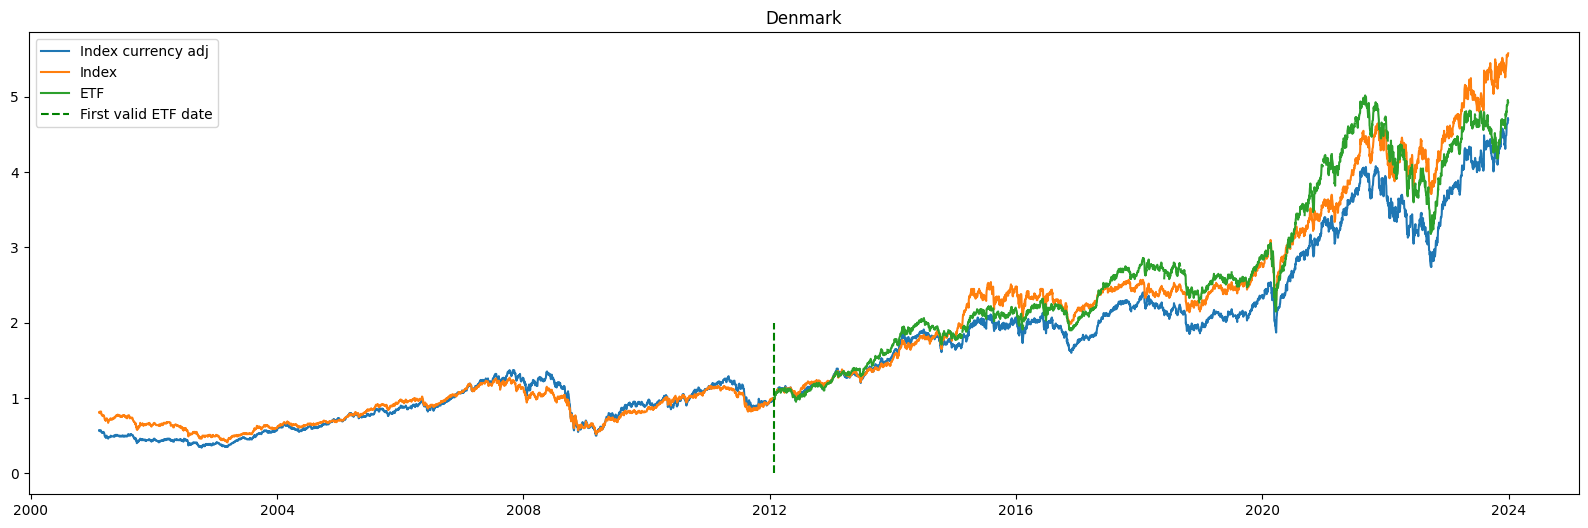

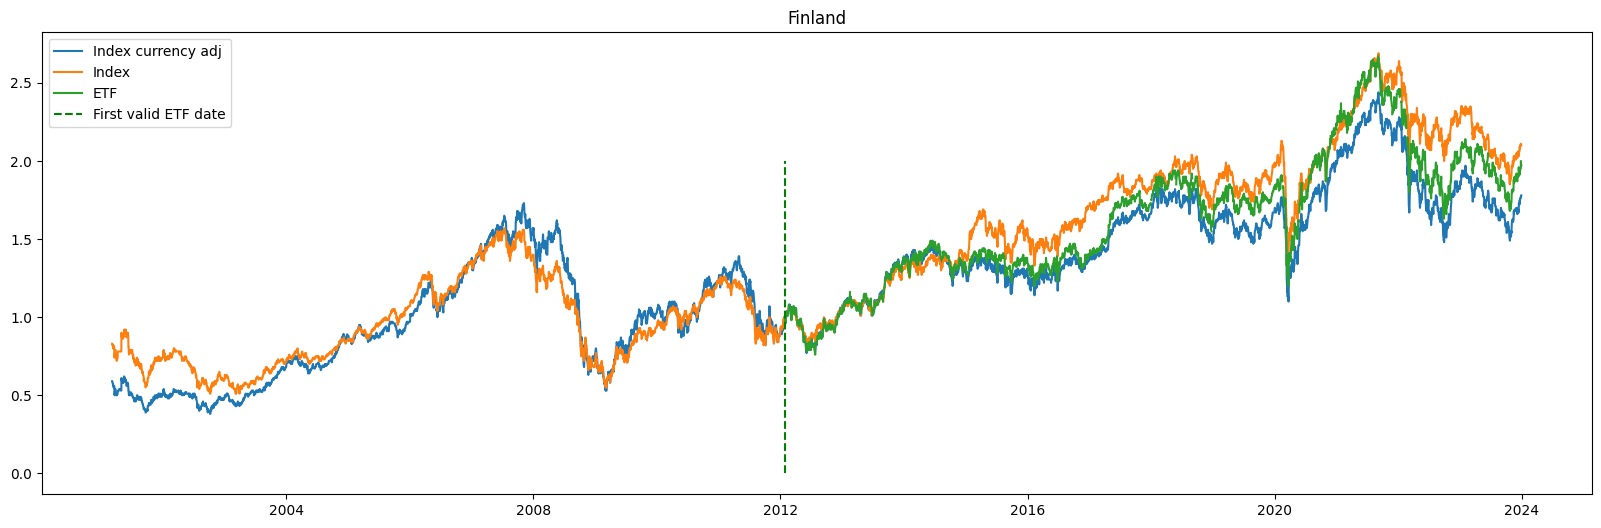

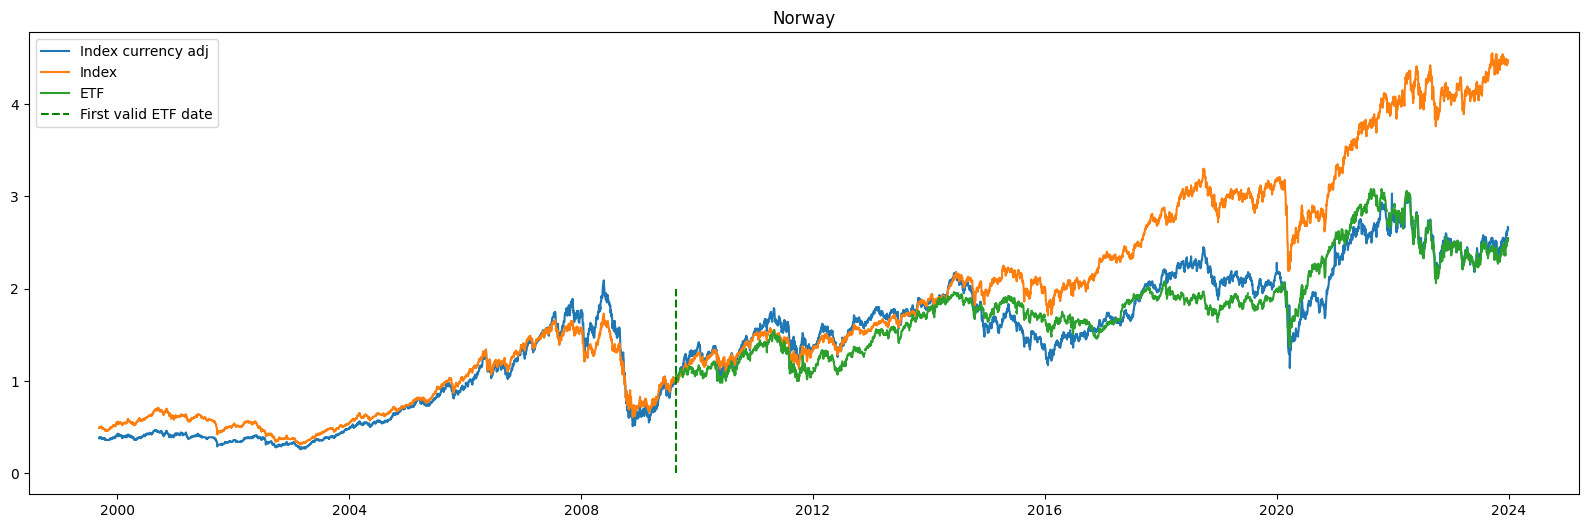

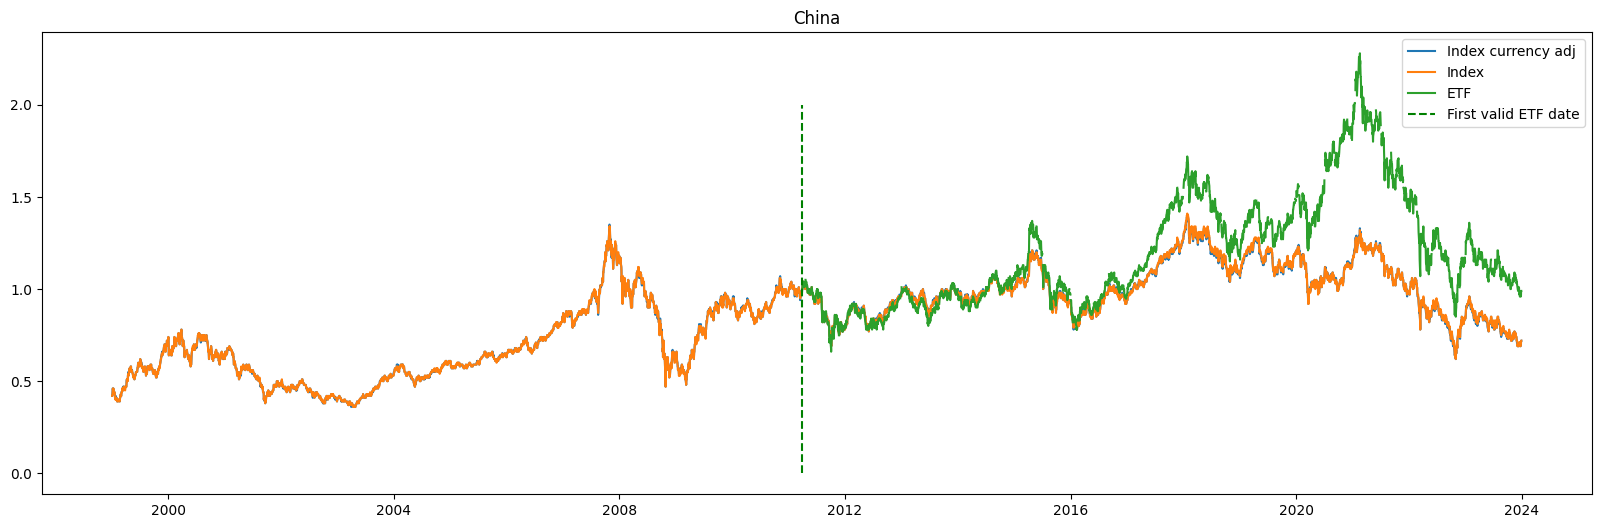

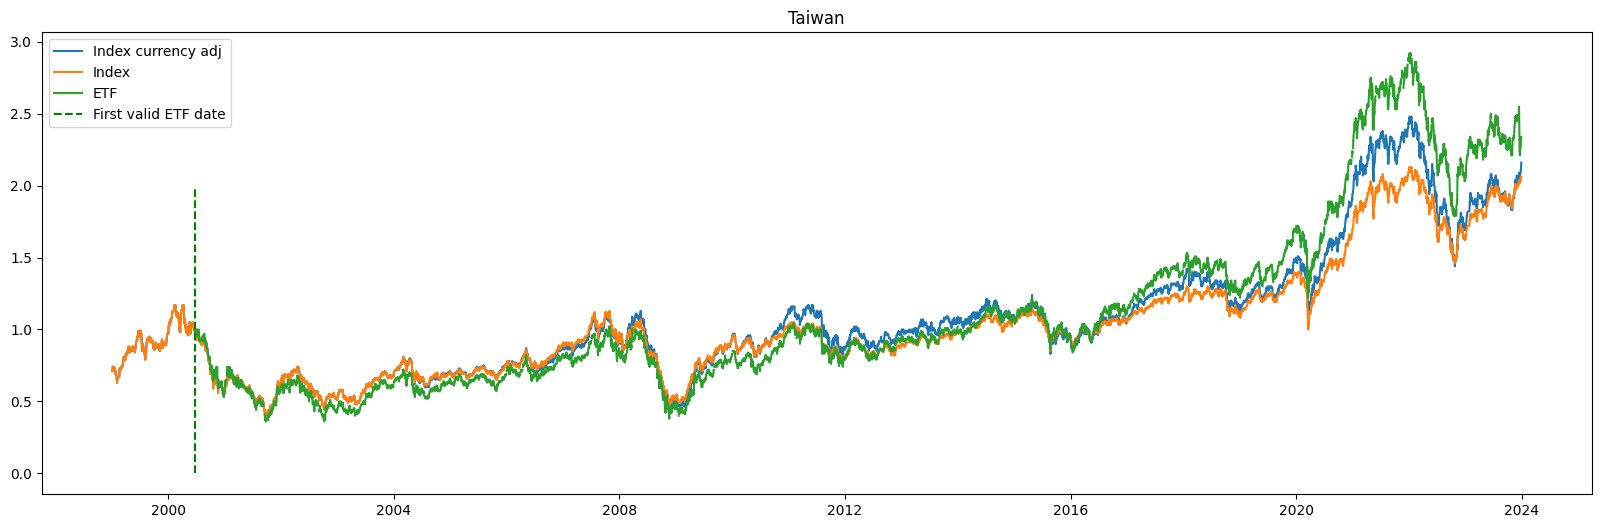

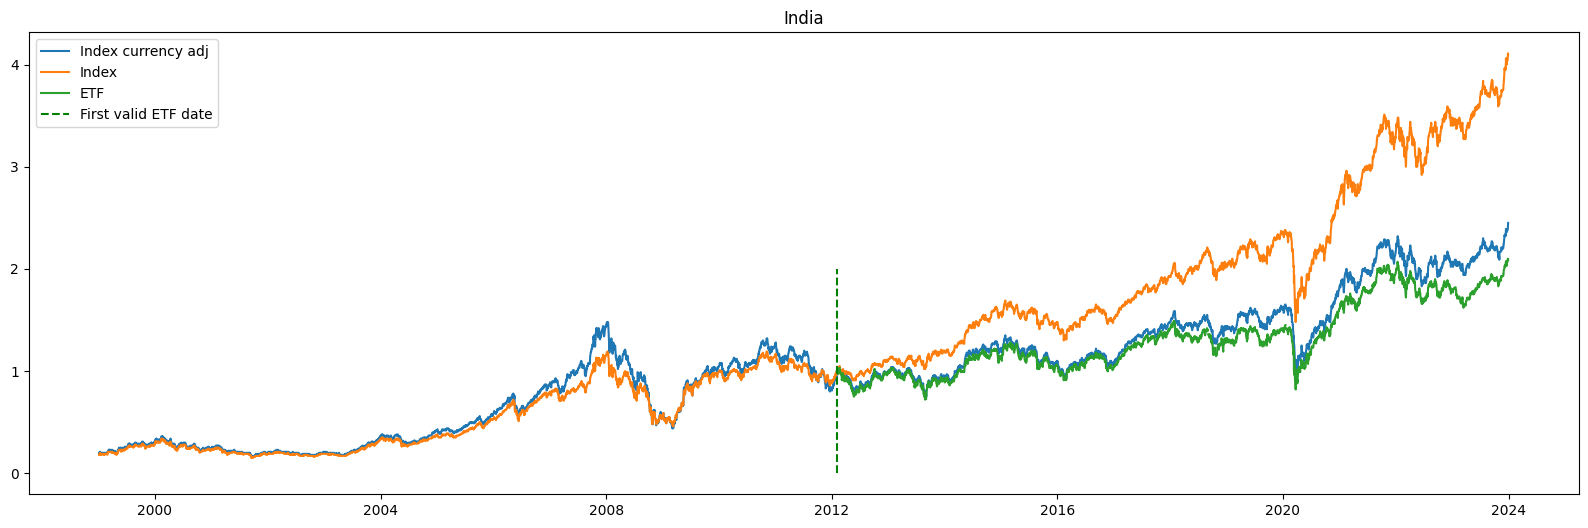

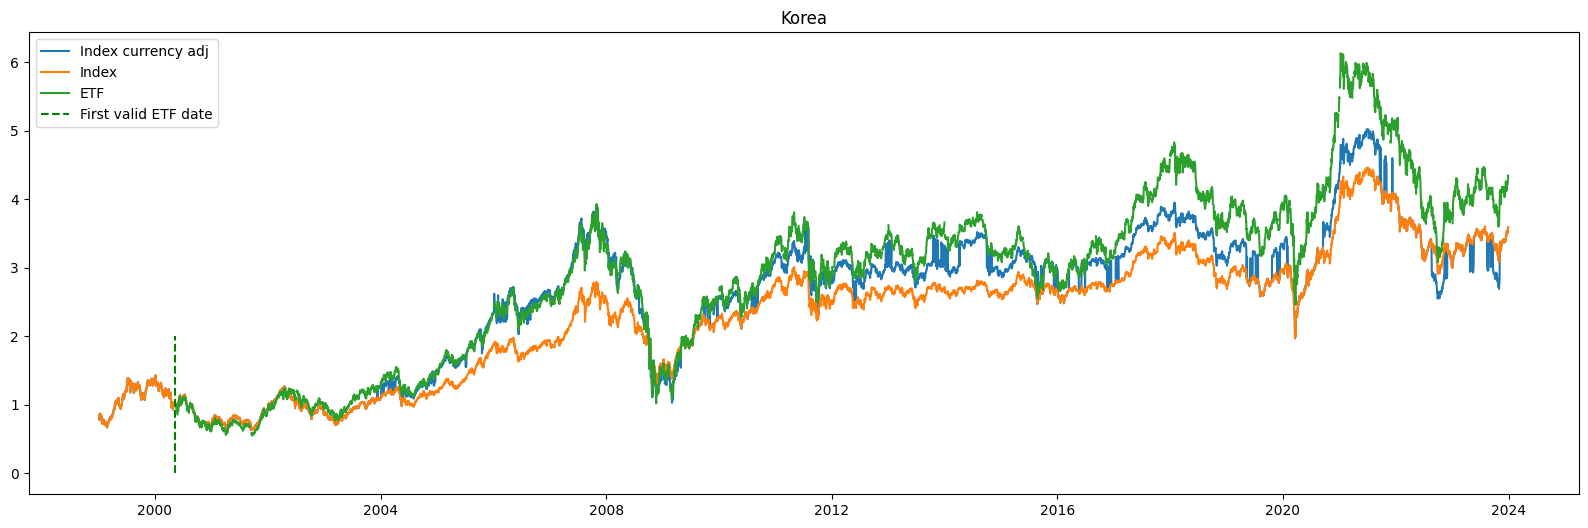

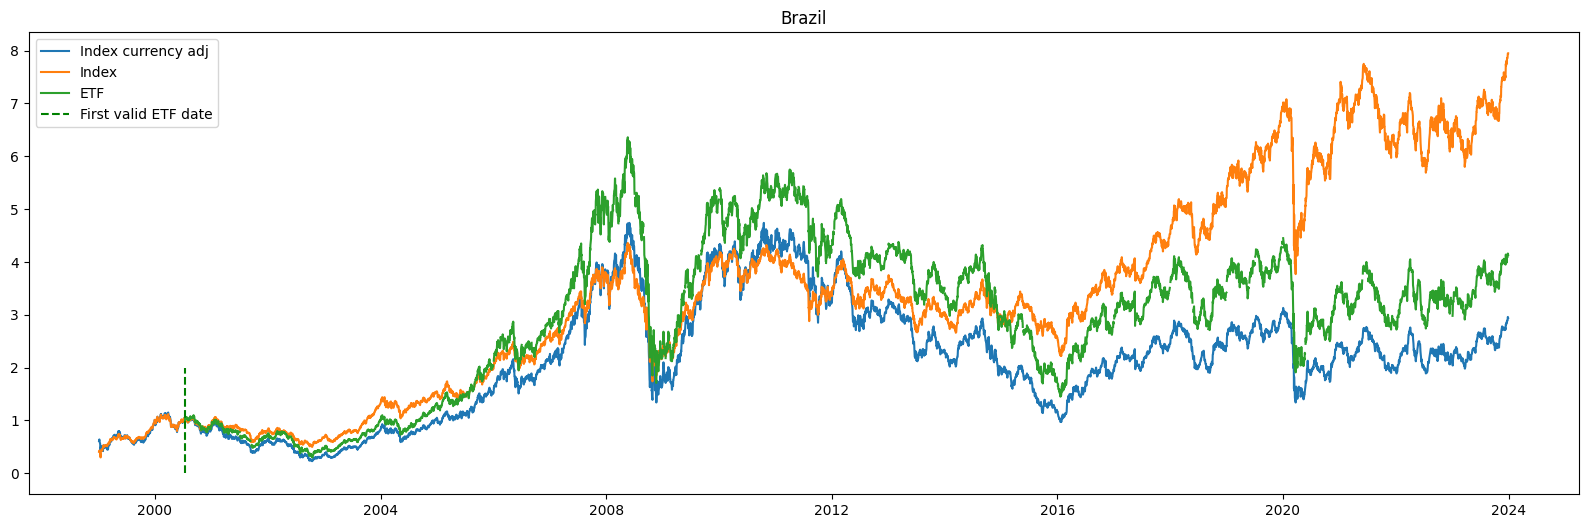

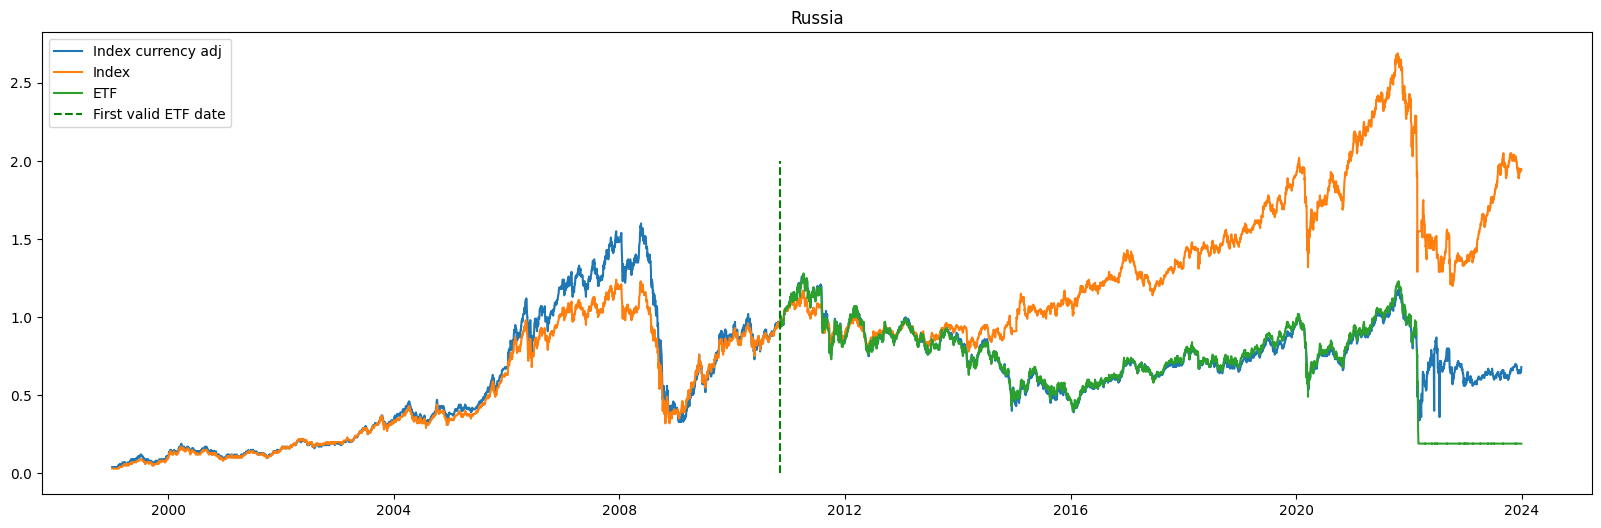

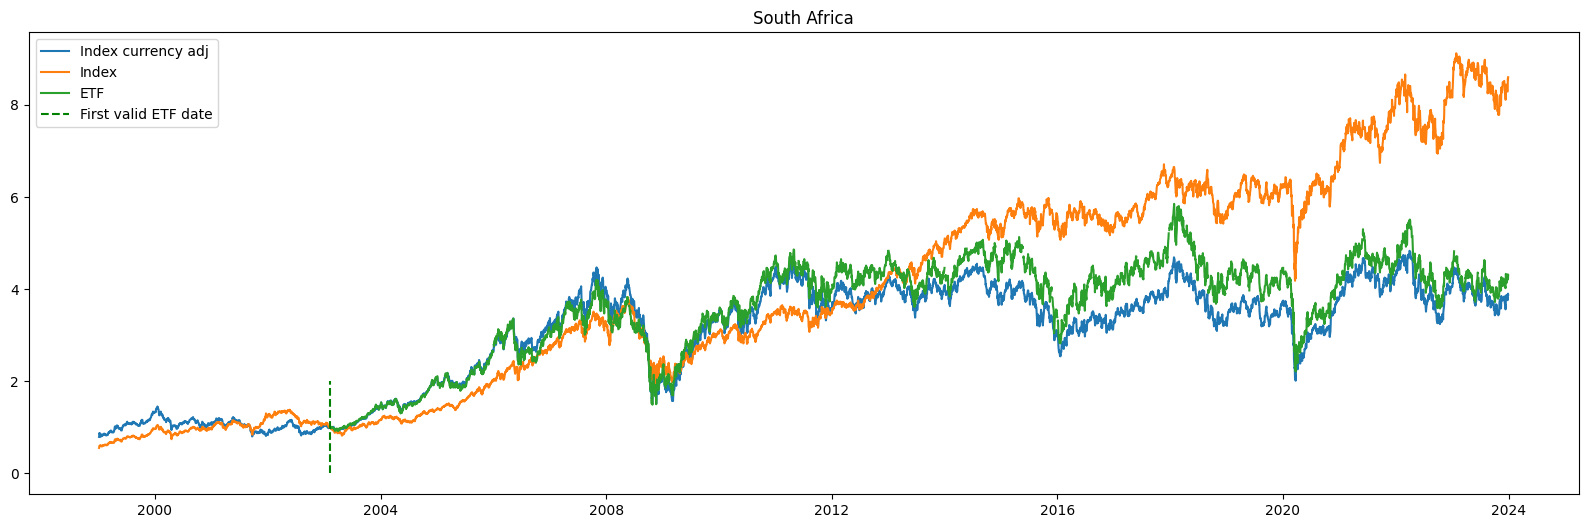

In [59]:
# Countries that would need to fill missing ETF data

for country in df_etfs.columns:
    first_valid = df_etfs[country].first_valid_index()
    if not str(first_valid).startswith('1999-01-04'):
        compare_data(country, first_valid)

### Creating synthetic EFT data with index values adjusted with currency rates to USD

In [48]:
df_synthetic_etfs = pd.DataFrame(index=pd.date_range('1999-01-04', '2023-12-29', freq='B'),
                                 columns=['China','Taiwan','India','Korea','Brazil',
                                          'Russia','Norway','Denmark','Finland','South Africa'])

In [49]:
def fill_missing_etf_data(country, norm_date):    
    if country == 'China':  # Hang Seng is much more similar to MSCI China than Shanghai composite
        index = df_stock_indices['Hong Kong']
        currency_rate = df_currency_rates['Hong Kong']
    else:
        index = df_stock_indices[country]
        currency_rate = df_currency_rates[country]

    index_adj = index[:norm_date]*currency_rate[:norm_date]
    index_adj_norm = index_adj/index_adj[norm_date]
    index_adj_norm = index_adj_norm.round(2)

    etf = df_etfs[country]
    synthetic_etf = index_adj_norm*etf[norm_date]
    synthetic_etf = synthetic_etf.round(2)
    df_synthetic_etfs[country].loc[:norm_date] = synthetic_etf

In [50]:
for country in df_synthetic_etfs.columns:
    first_valid = df_etfs[country].first_valid_index().strftime("%Y-%m-%d")
    if not first_valid.startswith('1999-01-04'):
        print(country, first_valid)
        fill_missing_etf_data(country, first_valid)

China 2011-03-31
Taiwan 2000-06-23
India 2012-02-03
Korea 2000-05-12
Brazil 2000-07-14
Russia 2010-11-09
Norway 2009-08-19
Denmark 2012-01-26
Finland 2012-01-26
South Africa 2003-02-07


In [51]:
df_synthetic_etfs = df_synthetic_etfs.astype(float)
df_synthetic_etfs

,China,Taiwan,India,Korea,Brazil,Russia,Norway,Denmark,Finland,South Africa
1999-01-04,17.24,13.95,4.44,11.99,5.17,1.69,NaN,NaN,NaN,7.67
1999-01-05,17.24,13.95,4.44,11.84,5.34,1.69,NaN,NaN,NaN,7.87
1999-01-06,18.06,13.95,4.67,12.60,5.42,1.69,NaN,NaN,NaN,8.45
1999-01-07,18.88,14.54,4.67,13.05,5.17,1.69,NaN,NaN,NaN,8.35
1999-01-08,18.88,14.54,4.91,12.90,5.00,1.69,NaN,NaN,NaN,8.45
...,...,...,...,...,...,...,...,...,...,...
2023-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
for country in df_synthetic_etfs.columns:
    first_valid = df_synthetic_etfs[country].first_valid_index().strftime("%Y-%m-%d")
    if not first_valid.startswith('1999-01-04'):
        print(country, first_valid)

Norway 1999-09-07
Denmark 2001-02-09
Finland 2001-03-08


In [55]:
def compare_corrected_data(country):
    plt.figure(figsize=(20,6))

    etf = df_etfs[country].dropna()
    norm_date = etf.first_valid_index()
    etf_norm = etf/etf.iloc[0]
    etf_norm = etf_norm.round(2)
    plt.plot(etf_norm, label='ETF')    
    
    if country == 'China':
        index = df_stock_indices['Hong Kong']
        currency_rate = df_currency_rates['Hong Kong']
    else:
        index = df_stock_indices[country]
        currency_rate = df_currency_rates[country]

    index_adj = index*currency_rate
    index_norm = index_adj/index_adj[norm_date]
    index_norm = index_norm.round(2)
    plt.plot(index_norm, label='Stock Index')

    synth_etf = df_synthetic_etfs[country].dropna()
    synth_etf_norm = synth_etf/synth_etf.iloc[-1]
    synth_etf_norm = synth_etf_norm.round(2)
    plt.plot(synth_etf_norm, label='Synthetic ETF')

    plt.title(country)

    plt.vlines(x=norm_date, ymin=0, ymax=2, 
               color='g', linestyle='--', 
               label='First valid date')

    plt.legend()
    plt.show()

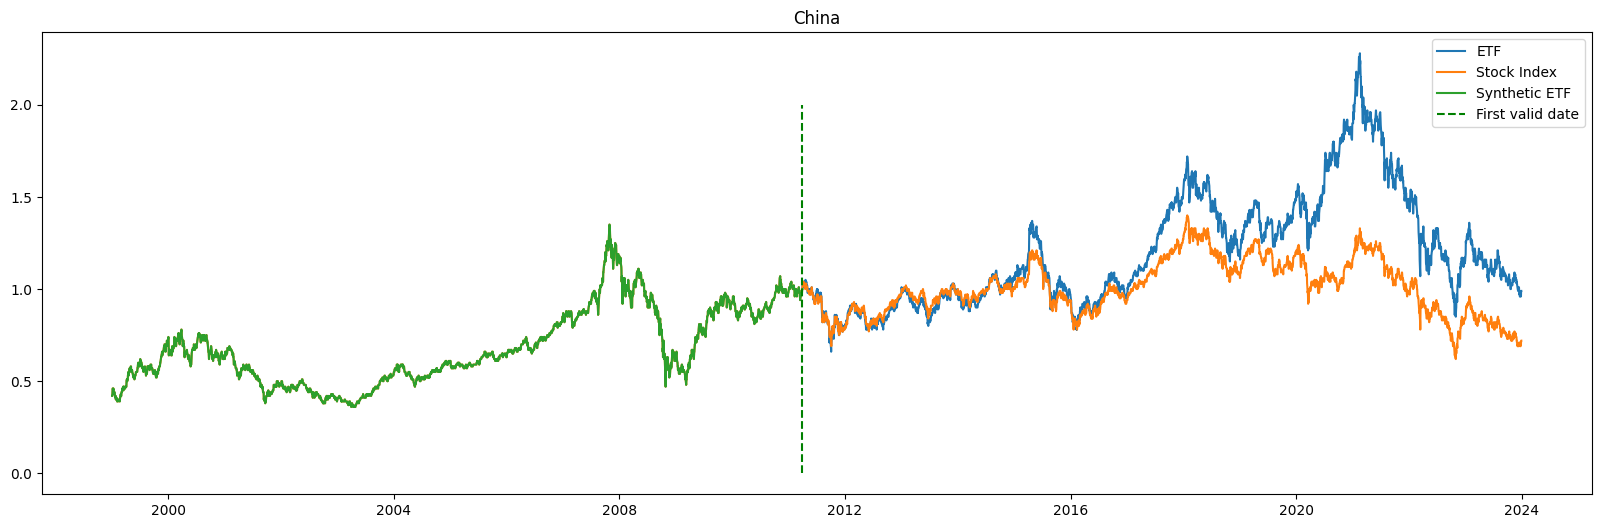

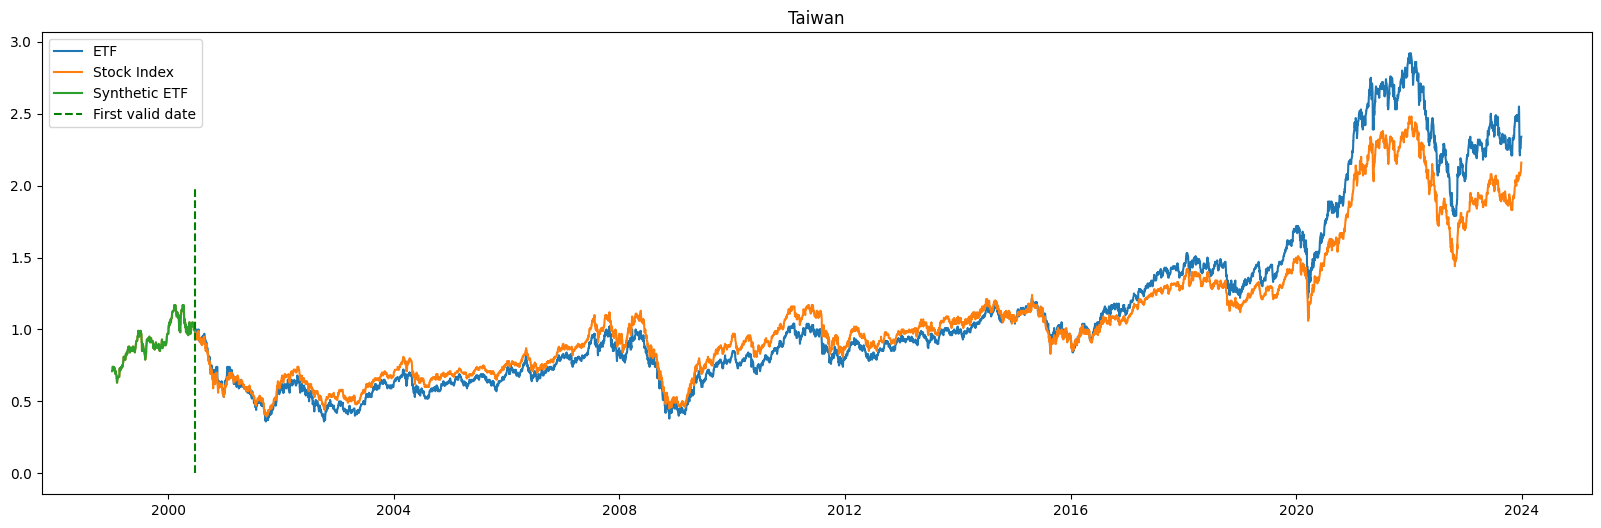

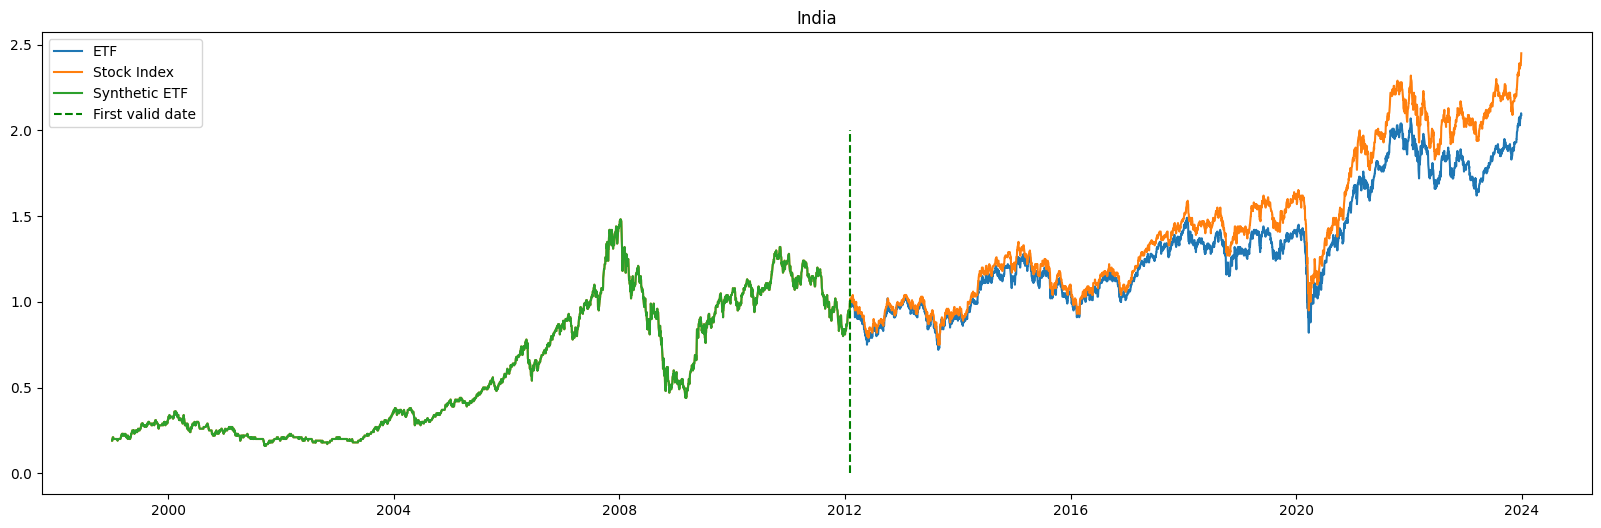

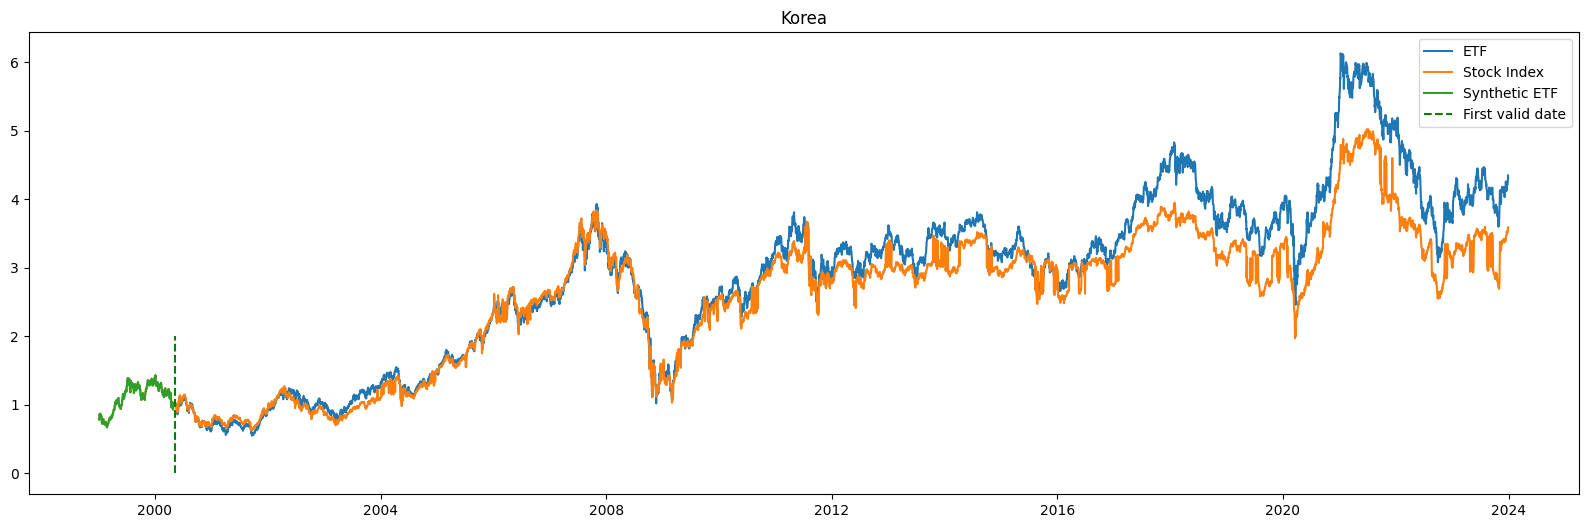

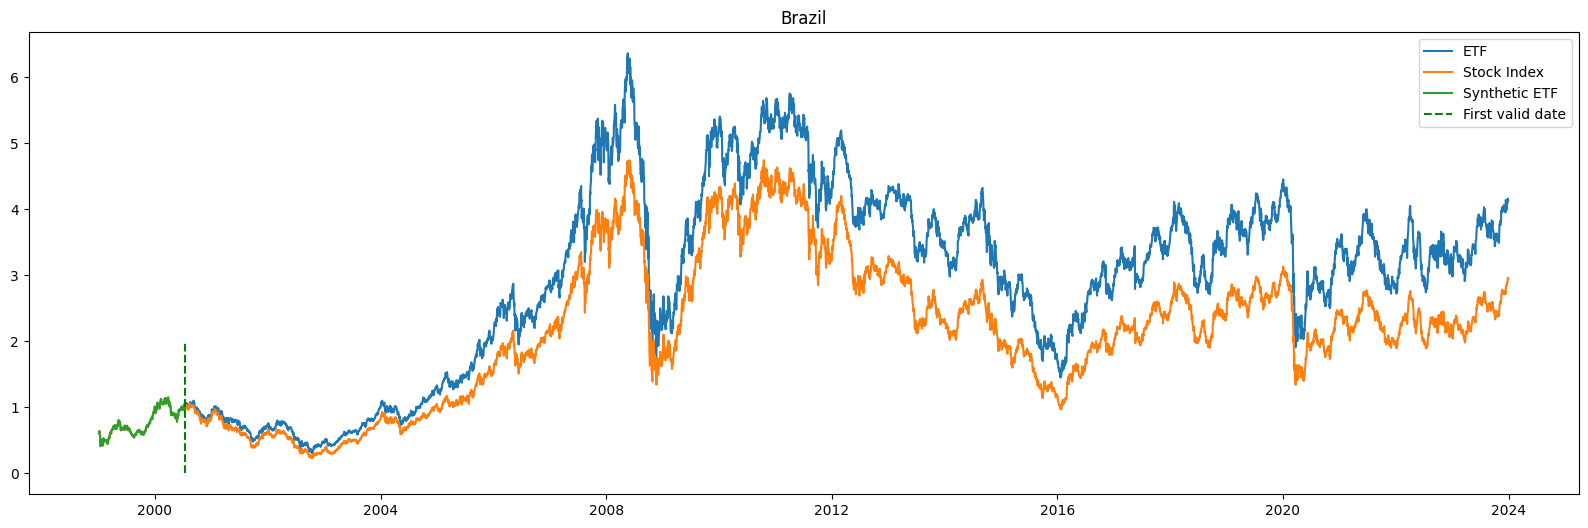

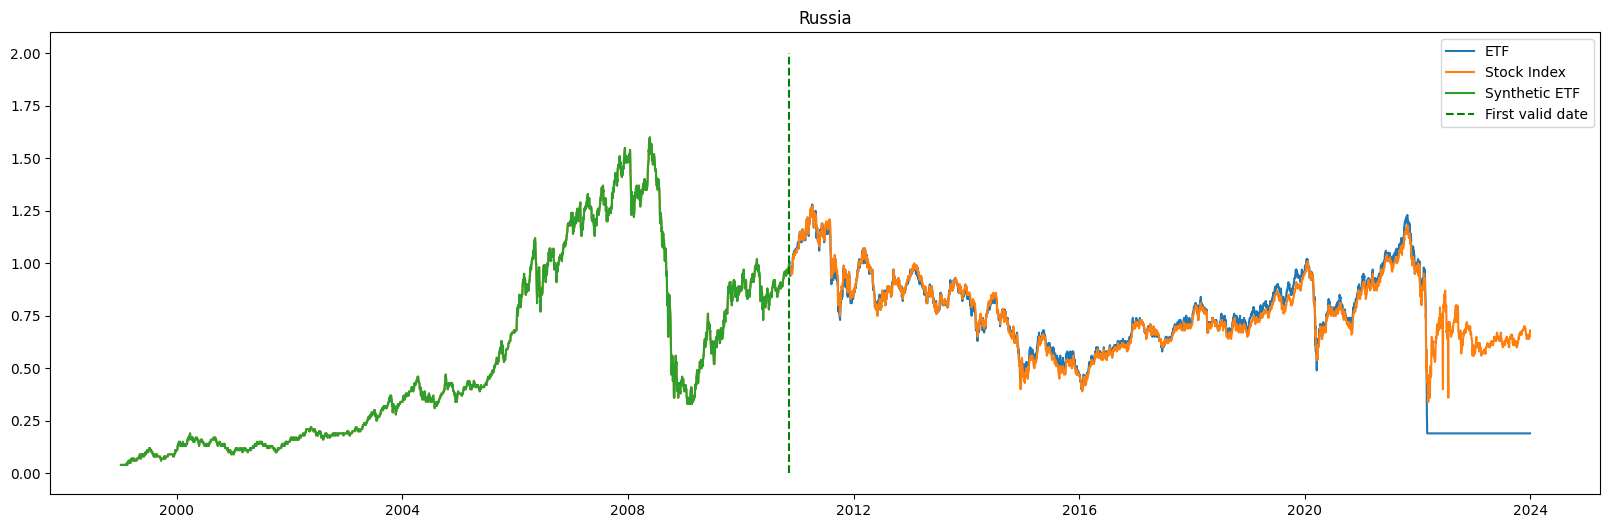

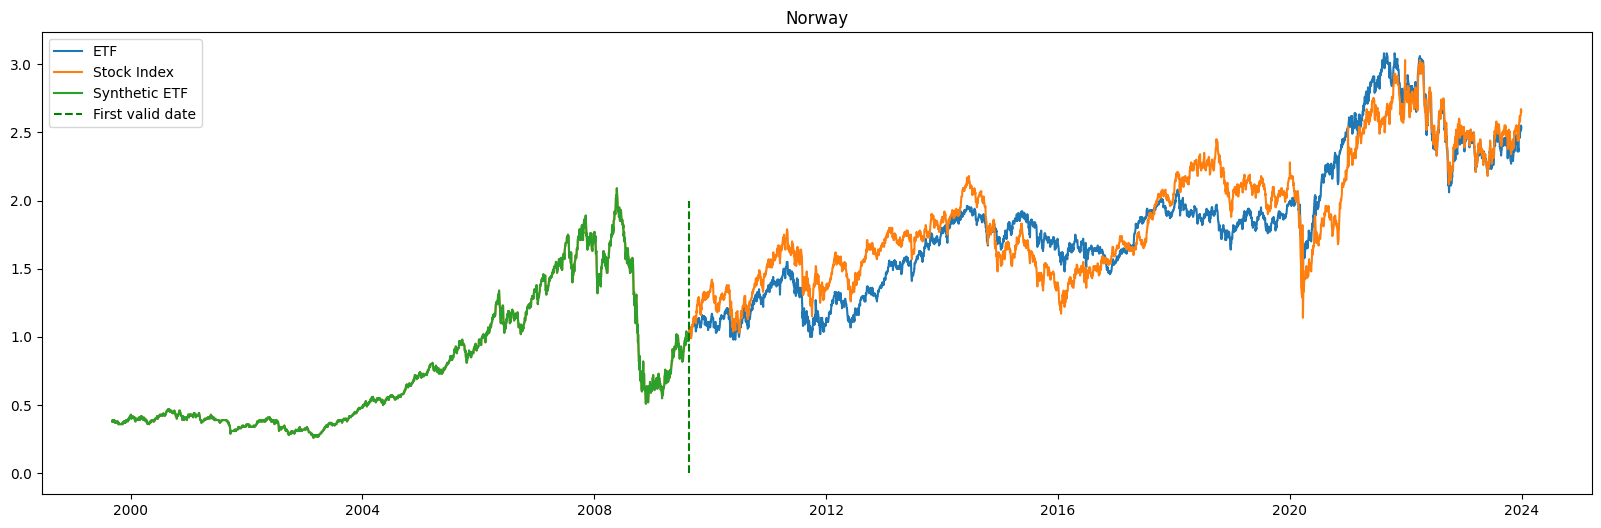

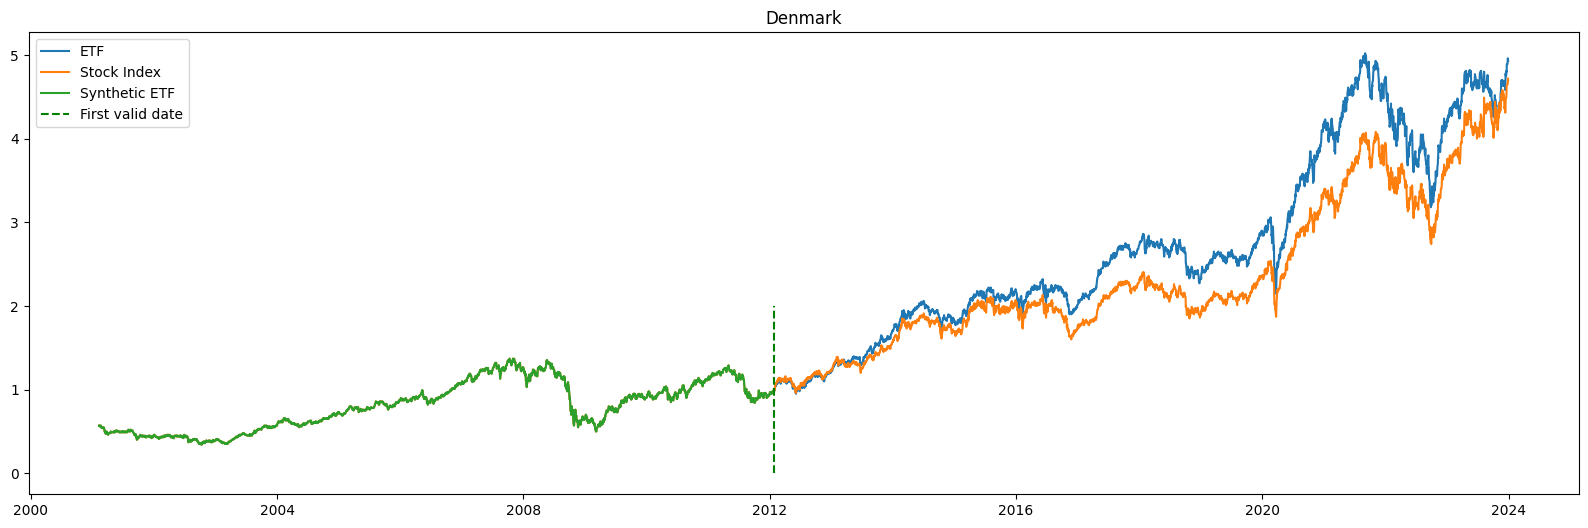

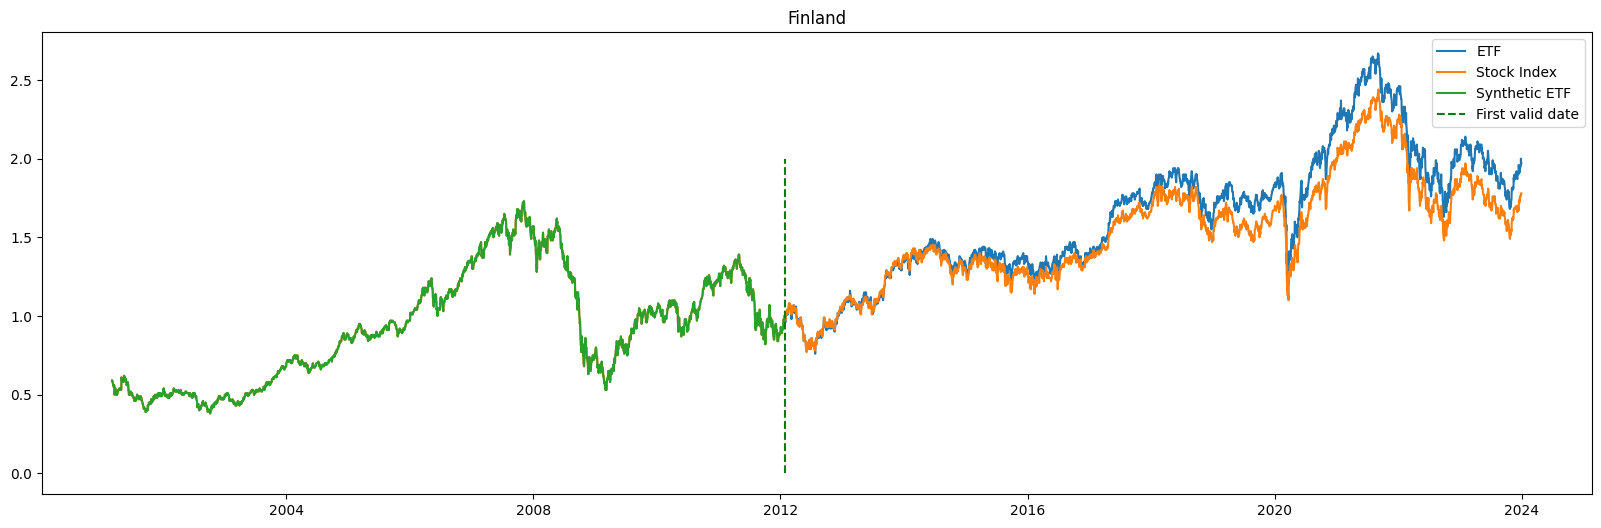

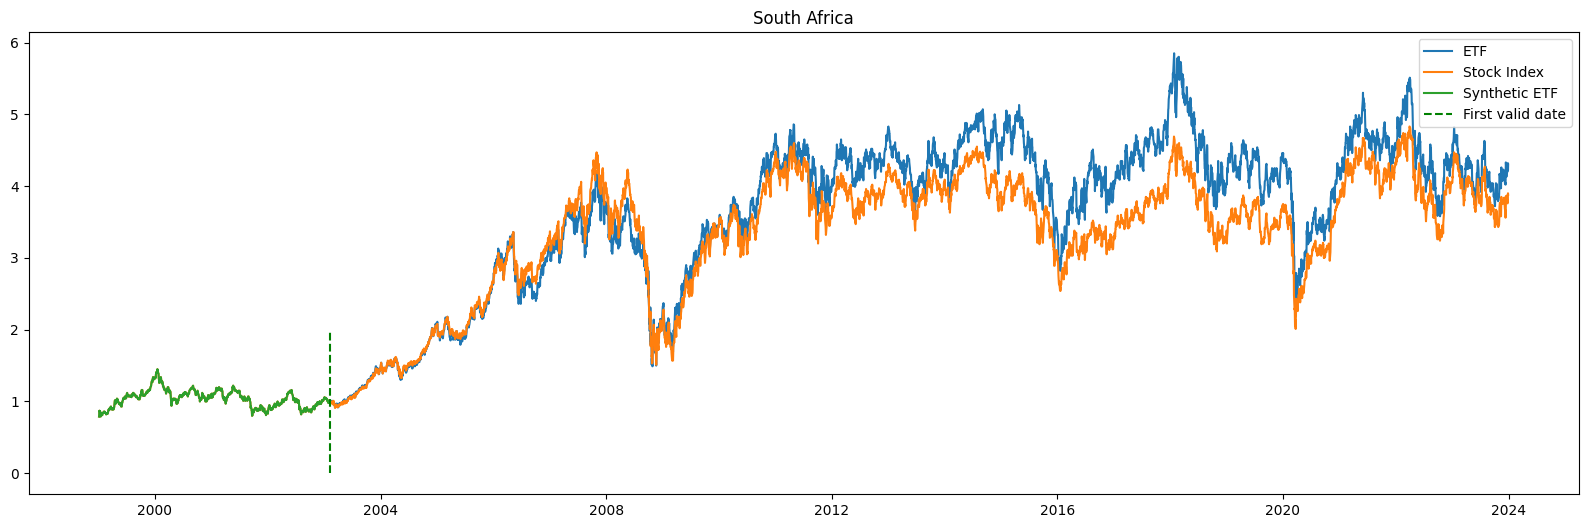

In [56]:
for country in df_synthetic_etfs.columns:
    compare_corrected_data(country)